# What drives the price of a car?

![](images/kurt.jpeg)

## 1) OVERVIEW

In this application, we are exploreing a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Our goal is to understand what factors make a car more or less expensive.  As a result of this analysis, we can provide clear recommendations to our client -- a used car dealership -- as to what consumers value in a used car.

### 2) CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM. This process provides a framework for working through a data problem.  As a first step in this application to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, trying to answer the questions below.

### 3) Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### 3.1) About Used Cars Business
A used car, a pre-owned vehicle, or a secondhand car, is a vehicle that has previously had one or more retail owners. Established in 1898, the Empire State Motor Wagon Company in Catskill, New York was one of the first American used car lots. Used Car busines is multi billion dollar industry, there is a huge market outside of USA too. 

Used cars are sold through a variety of outlets, including franchise and independent car dealers, rental car companies, buy here pay here dealerships, leasing offices, auctions, and private party sales. Some car retailers offer no-haggle prices, certified used cars, and extended service plans or warranties.

The growth of the Internet has fueled the availability of information on the prices of used cars. This information was once only available in trade publications that dealers had access to. There are now numerous sources, such as online appraisal tools and internet classified ads, for used car pricing.

### 3.2) AI/ML Based Price recommendation / prediction System
In this highly competitive age, creation of a Price recommendation/prediction System based on sales data from 1909 to 2014 would be very useful for clients in setting up price for end consumers to achieve substantial growth in sale.

The recommendation system is based on a regression model which is trained on clean data with relavent features and it should have maximum accuracy in predicting prices.

### 3.3) Technical Landscape of the Solution 

In the recommendation system, we are leveraging Python ML models together with Scikit-Learn Python library, which is most used accros the industry. The data mining decisions will be made based on modeling and analysis.

Visualization will add more user friendly representation of the outcomes and help understand the predictive model recommendation for non-technical business users.

### 4) Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### 4.1) Data Source
This data comes to us from dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.



### 4.2) Data Overveiw

Below I am using some basis Python to import data from the csv file and do some basic lookup.Use the prompts below to get started with your data analysis

In [42]:
# Essential imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
# Data import
used_cars = pd.read_csv('data/vehicles.csv')
print(used_cars.info())
print('**************************')
print(used_cars.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [44]:
# Basic analysis - describe
used_cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [45]:
# Basic analysis - head
used_cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [46]:
# Basic analysis - tail
used_cars.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [47]:
# Basic analysis - random sample
used_cars.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
294647,7303998131,cleveland,20890,2015.0,ford,expedition el,NaN,6 cylinders,gas,119676.0,clean,automatic,1FMJK2AT0FEF06518,4wd,NaN,NaN,green,oh
232499,7314605989,charlotte,34990,2018.0,lexus,rx 350 sport utility 4d,good,NaN,other,22396.0,clean,other,2T2ZZMCA8JC095208,NaN,NaN,other,silver,nc
409611,7316313498,seattle-tacoma,0,2013.0,jeep,wrangler unlimited rubicon,NaN,6 cylinders,gas,105297.0,clean,automatic,1C4HJWFG2DL671441,4wd,NaN,SUV,NaN,wa
43544,7313672357,orange county,15000,2013.0,ford,flex sel,NaN,6 cylinders,gas,101000.0,clean,automatic,NaN,4wd,full-size,SUV,white,ca
267352,7310327444,buffalo,41991,2014.0,ram,2500 crew cab,NaN,6 cylinders,diesel,93643.0,clean,automatic,3C6UR5DL7EG195470,4wd,NaN,pickup,red,ny
371089,7315053325,dallas / fort worth,0,2000.0,dodge,durango,NaN,8 cylinders,gas,136617.0,clean,automatic,1B4HS28Z0YF211765,4wd,NaN,SUV,brown,tx
9640,7307732026,mohave county,5995,2012.0,nissan,versa,NaN,NaN,gas,68000.0,clean,automatic,NaN,rwd,NaN,sedan,NaN,az
347960,7309818097,greenville / upstate,0,2001.0,saturn,sl,good,4 cylinders,gas,0.0,clean,automatic,1G8ZH52841Z356877,fwd,NaN,sedan,custom,sc
79592,7309942400,fort collins / north CO,48489,2016.0,jeep,grand cherokee,NaN,8 cylinders,gas,50178.0,clean,automatic,NaN,4wd,mid-size,SUV,custom,co
388870,7303876743,vermont,99,2013.0,chevrolet,equinox,NaN,NaN,other,98376.0,clean,automatic,1GNFLEEK5DZ106994,4wd,full-size,NaN,red,vt


### 4.3) Data observation
Total 17 columns, aproximately 400k+ rows, Othee than index: id, there are three numeric columns and 13 non-numeric columns. All the column values are not fully populated , many null values and NANs in many columns.

### 5) Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [48]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder,StandardScaler
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel


from sklearn import set_config
set_config(display="diagram")

from warnings import filterwarnings
filterwarnings('ignore')
#import missingno as msno

# Advanced Regression ensamble models
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 5.1) Cleaning data

In [49]:
#Drop column values with NANs
used_cars_clean = used_cars.dropna()

In [50]:
#Remove duplicates (if any)
used_cars_clean.drop_duplicates(inplace=True)

In [51]:
#Create a new 'age' column and drop 'year' column
used_cars_clean['age'] = 2022 - used_cars_clean.year.astype(int)
used_cars_clean.year = used_cars_clean.year.astype(int).astype(str)
used_cars_clean = used_cars_clean.drop(columns=['year'])

In [52]:
#Drop all rows that have price as zero(0)
used_cars_clean.drop(used_cars_clean.query("price== 0").index,inplace=True)

In [53]:
#Resetting index of the dataframe
used_cars_clean = used_cars_clean.reset_index().drop(columns=['index'])

In [54]:
#msno.bar(used_cars_clean);

In [55]:
# Basic analysis - describe after clean
used_cars_clean.describe()

,id,price,odometer,age
count,3.249600e+04,32496.000000,3.249600e+04,32496.000000
mean,7.311551e+09,16993.479013,1.089832e+05,11.061731
std,4.294195e+06,13219.394890,1.022710e+05,7.274987
min,7.301592e+09,1.000000,0.000000e+00,0.000000
25%,7.308238e+09,7500.000000,6.744975e+04,7.000000
50%,7.312411e+09,13125.500000,1.055840e+05,10.000000
75%,7.315154e+09,23395.000000,1.428455e+05,14.000000
max,7.317099e+09,155000.000000,9.999999e+06,117.000000


In [56]:
# Basic analysis - head after clean
used_cars_clean.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
0,7316482063,birmingham,4000,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,20
1,7316429417,birmingham,2500,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,27
2,7315946365,birmingham,9000,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al,14
3,7315354216,birmingham,8950,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al,11
4,7315349921,birmingham,4000,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al,50


In [57]:
# Basic analysis - tail after clean
used_cars_clean.tail()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
32491,7303314912,wyoming,23495,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy,7
32492,7303227528,wyoming,12995,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy,6
32493,7303114896,wyoming,32999,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy,8
32494,7303112347,wyoming,15999,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy,4
32495,7302338378,wyoming,6800,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy,25


### 5.2) Data Visualization: 
Graphs plot to understand the price correlation on 2000 sample

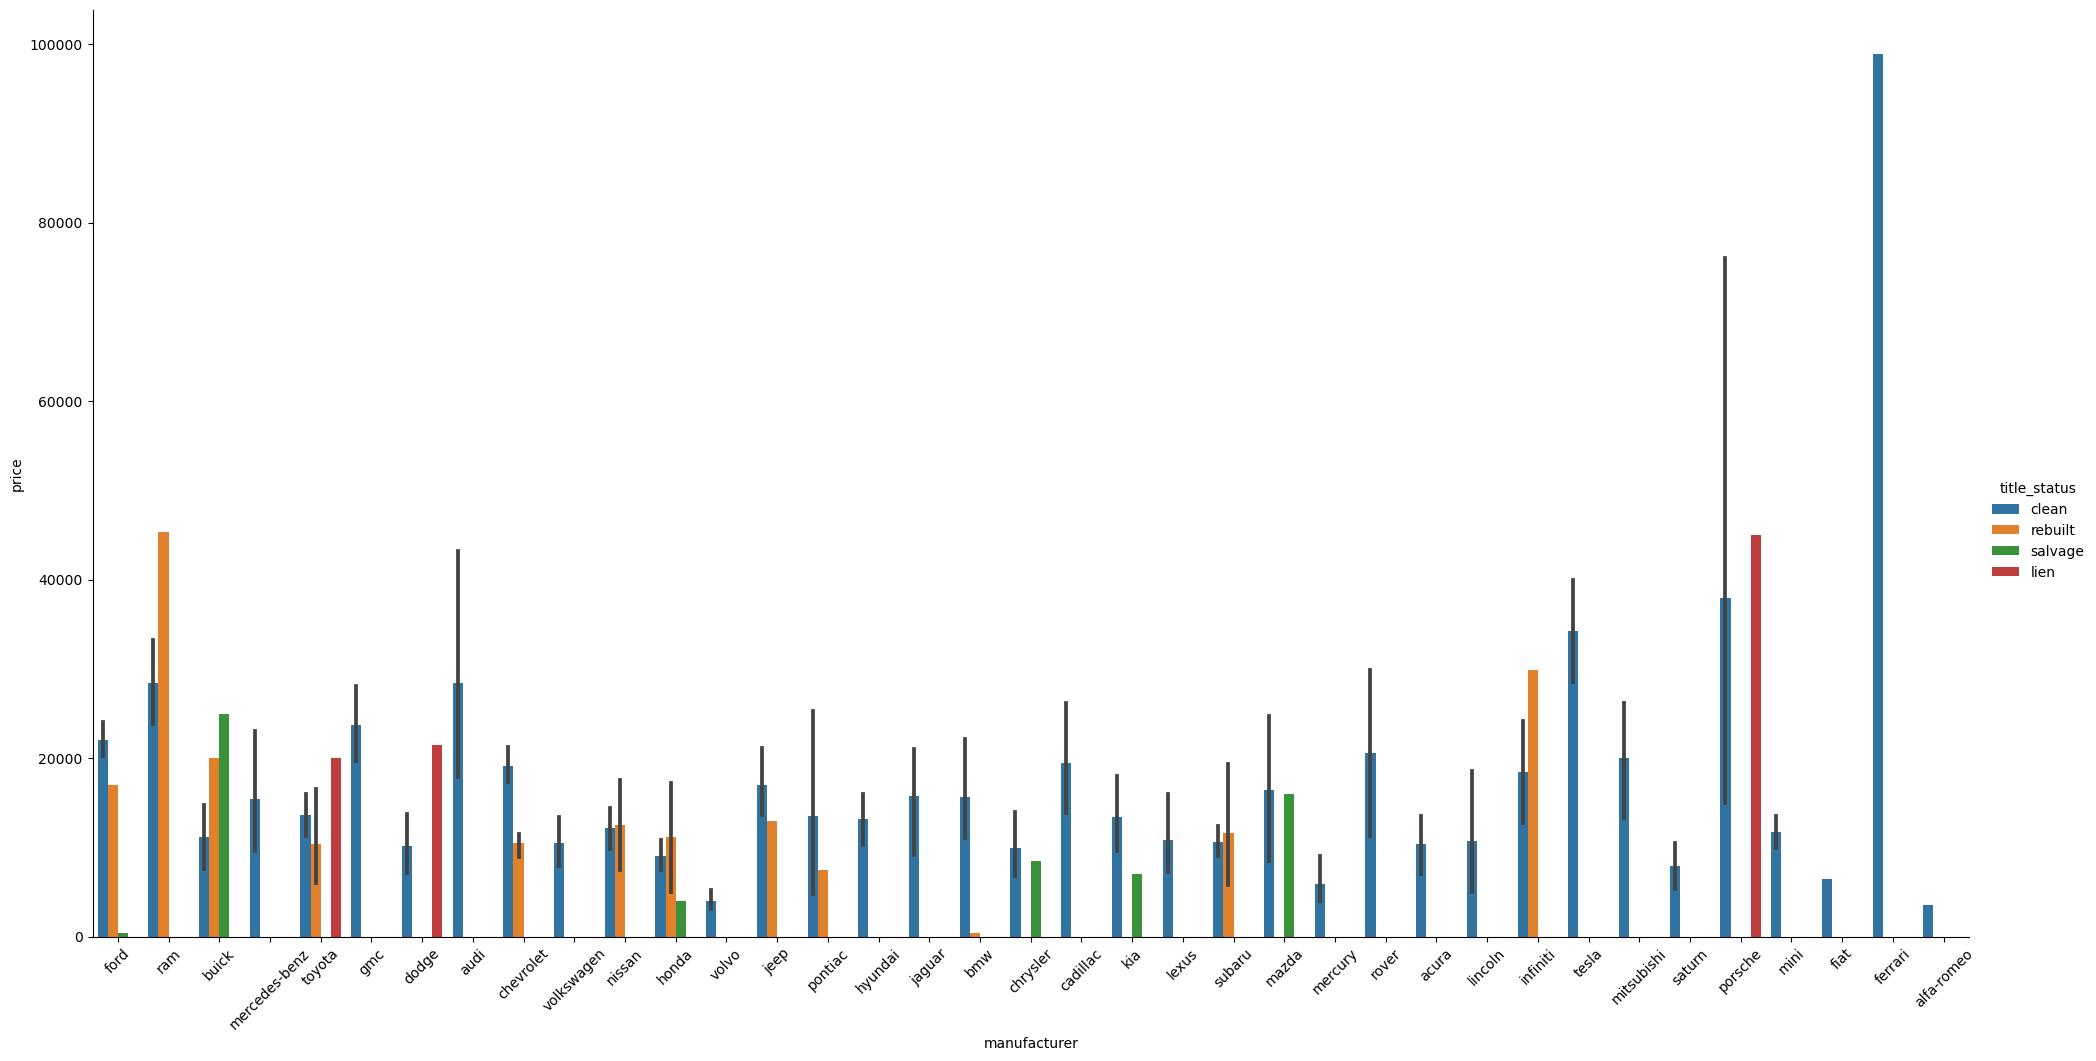

In [58]:
g = sns.catplot(x='manufacturer', y ='price', hue='title_status', data=used_cars_clean.sample(1000), 
            kind="bar", aspect=2, height=10)
g.set_xticklabels(rotation=45);

**Observation:**
Price is high if cars have cleean title

<Figure size 3000x800 with 0 Axes>

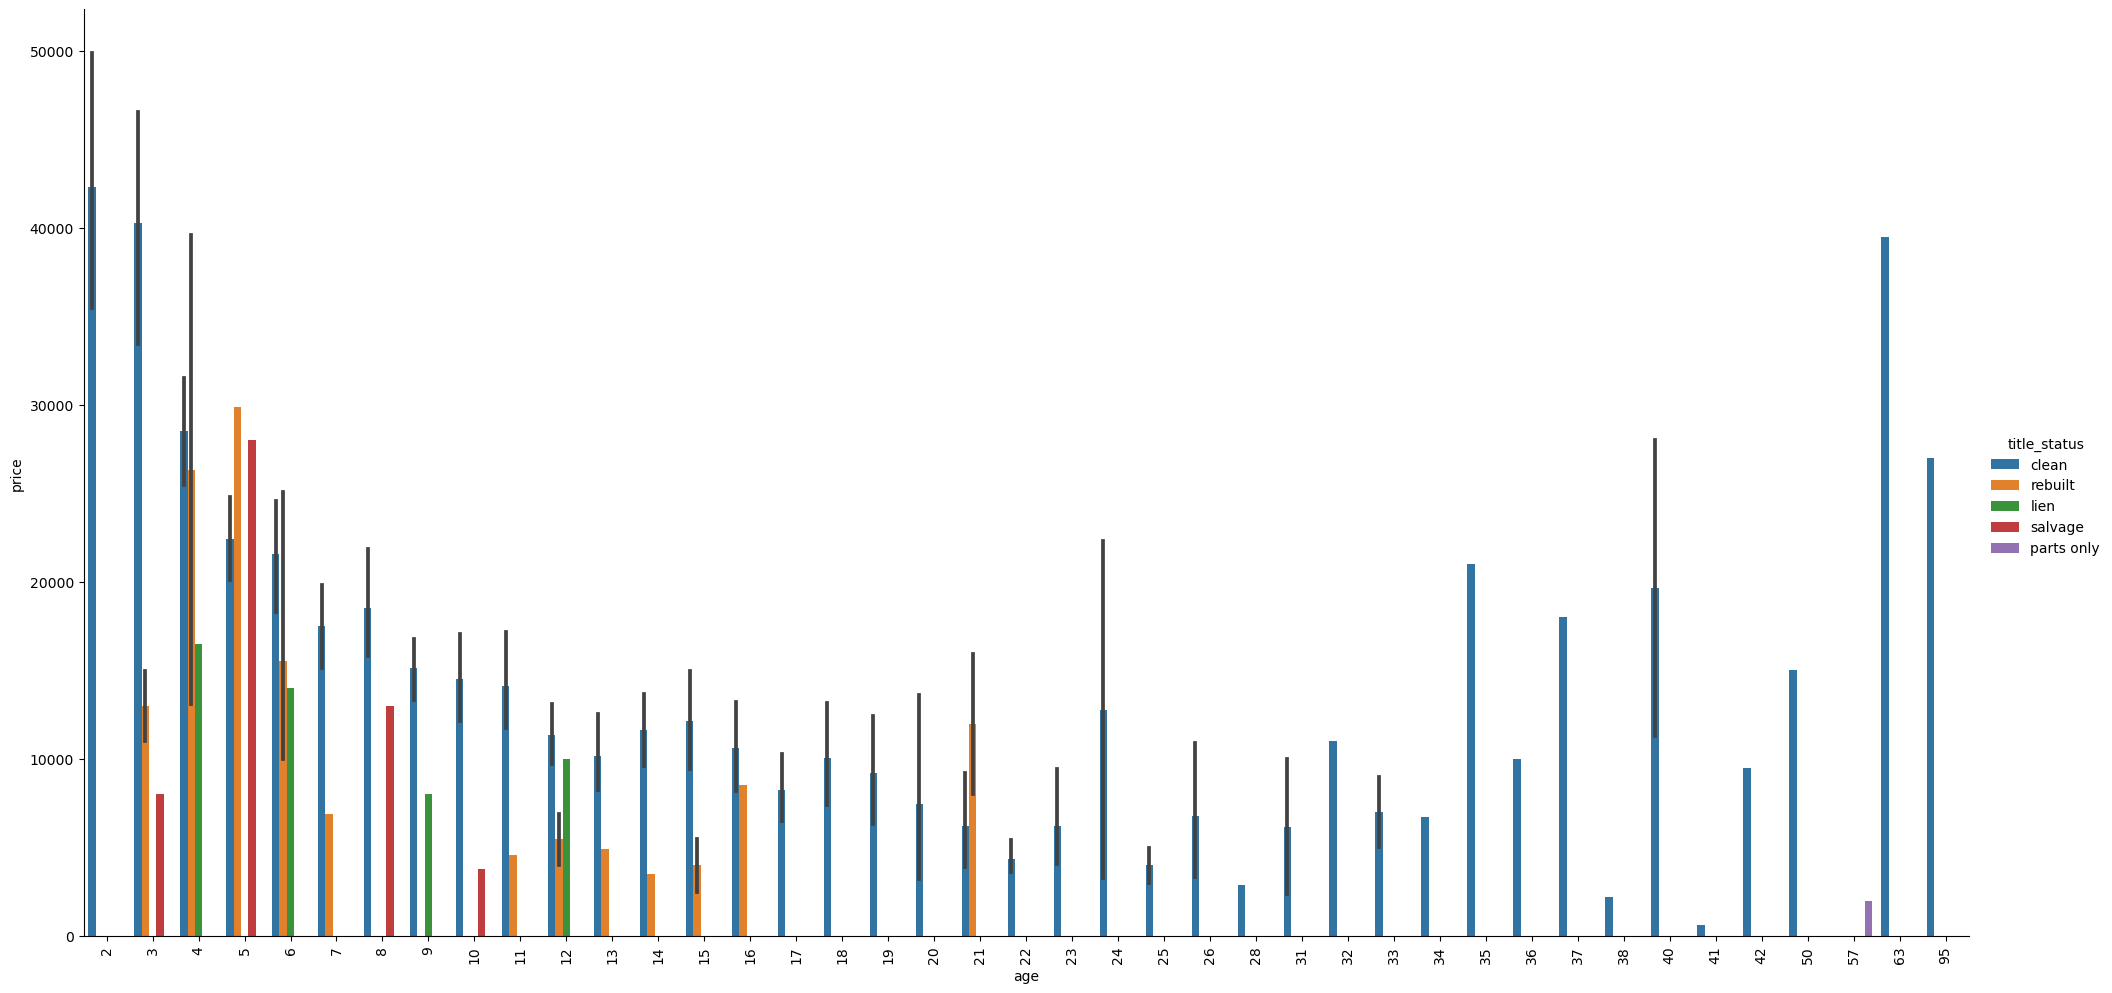

In [59]:
plt.figure(figsize=(30,8))
g = sns.catplot(x='age', y ='price', hue='title_status', data=used_cars_clean.sample(1000), 
            kind="bar", aspect=2, height=10)
g.set_xticklabels(rotation=90);

**Observation:**
Less old cars have high value. Caveat vintage cars have high prices too as they have differntly valued based on their legacy. 

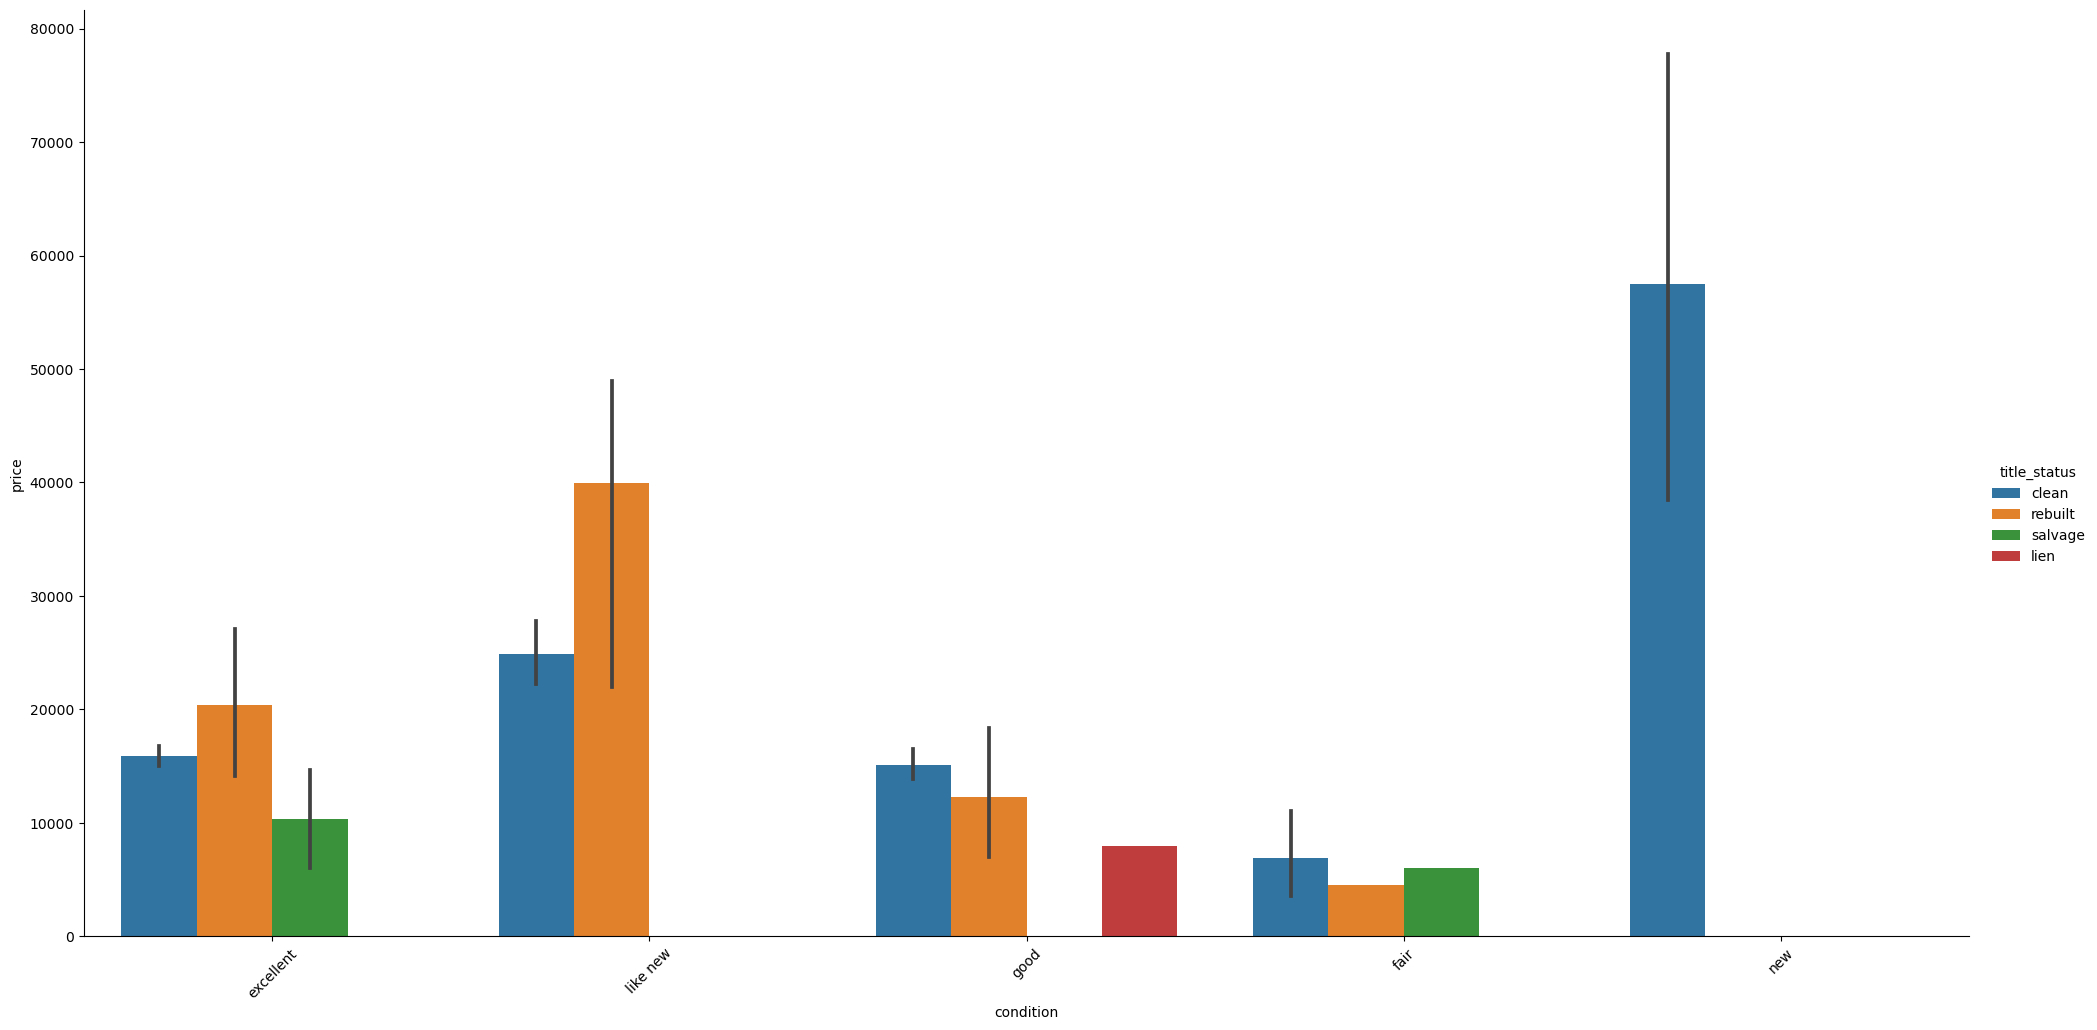

In [60]:
g = sns.catplot(x='condition', y ='price', hue='title_status', data=used_cars_clean.sample(1000), 
            kind="bar", aspect=2, height=10)
g.set_xticklabels(rotation=45);

**Observation:**
As expected, Cars having good condition has higher price.

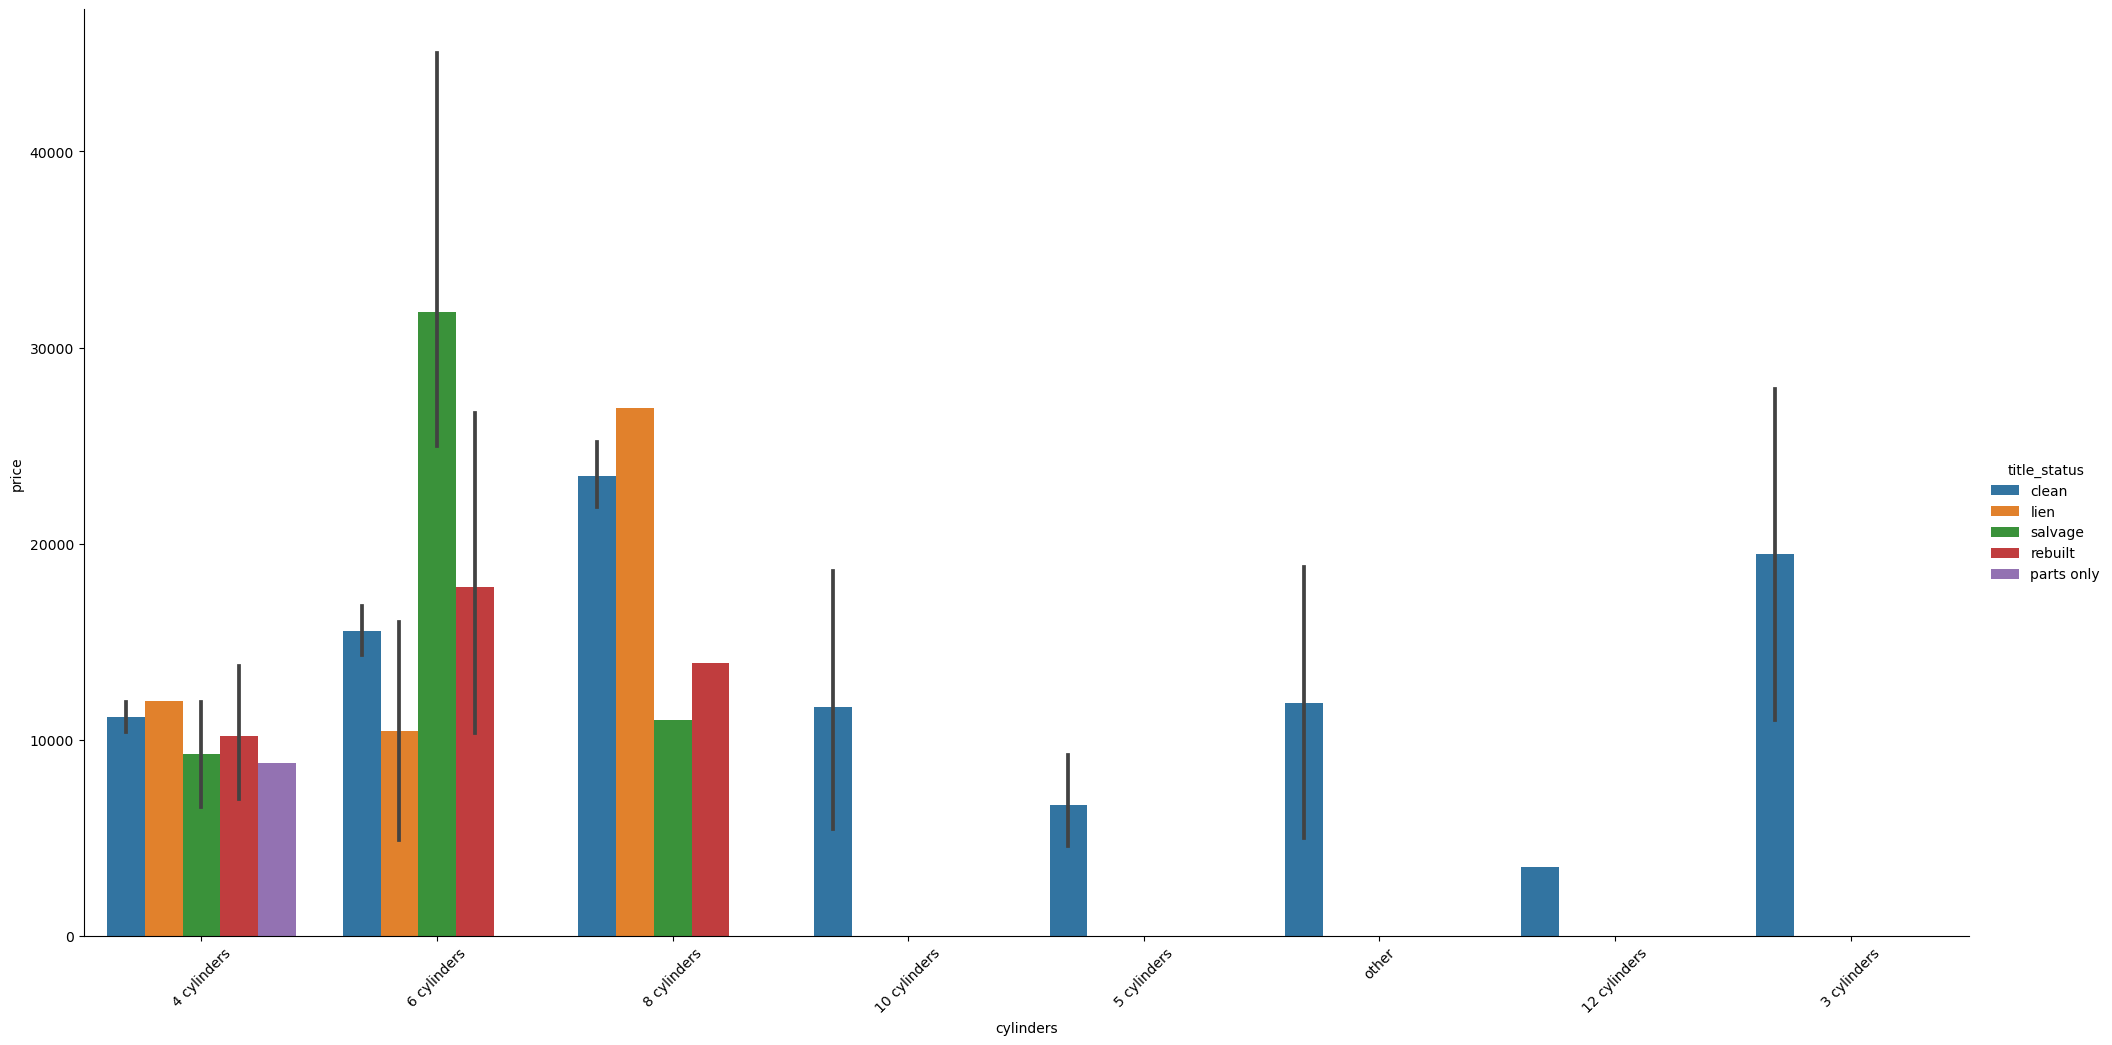

In [61]:
g = sns.catplot(x='cylinders', y ='price', hue='title_status', data=used_cars_clean.sample(1000), 
            kind="bar", aspect=2, height=10)
g.set_xticklabels(rotation=45);

**Observation:** Number of Cylinders playing an important role in pricing. Cylinders and price are direct correlated. For example, cars with 8 cylinder care highly priced compared to others.

### 5.3) Transformation: 
Transformation of non-numeric (Categorical) columns using LabelEncoder

In [62]:
#Categorical columns

encoders = []
def label_encode(cat_columns, df_enc):
    for c in cat_columns:
          le = LabelEncoder()
          encoders.append( le.fit(list(df_enc[c].astype(str).values)))
          df_enc[c] = le.transform(list(df_enc[c].astype(str).values))
            
def label_decode(df_enc):
    output = df_enc.copy()
    for col in cat_columns:
        output[col] = encoders[cat_columns.index(col)].inverse_transform(df_enc[col])
    return output

cat_columns = used_cars_clean.select_dtypes(exclude=np.number).columns.to_list()
print(f'Categorical columns: {cat_columns}\n\n')
used_cars_enc = used_cars_clean.copy()
label_encode(cat_columns,used_cars_enc)

Categorical columns: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']




In [63]:
# used_cars_clean.copy - info
print(used_cars_enc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32496 entries, 0 to 32495
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32496 non-null  int64  
 1   region        32496 non-null  int64  
 2   price         32496 non-null  int64  
 3   manufacturer  32496 non-null  int64  
 4   model         32496 non-null  int64  
 5   condition     32496 non-null  int64  
 6   cylinders     32496 non-null  int64  
 7   fuel          32496 non-null  int64  
 8   odometer      32496 non-null  float64
 9   title_status  32496 non-null  int64  
 10  transmission  32496 non-null  int64  
 11  VIN           32496 non-null  int64  
 12  drive         32496 non-null  int64  
 13  size          32496 non-null  int64  
 14  type          32496 non-null  int64  
 15  paint_color   32496 non-null  int64  
 16  state         32496 non-null  int64  
 17  age           32496 non-null  int64  
dtypes: float64(1), int64(17)
m

In [64]:
# used_cars_clean.copy - head
used_cars_enc.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
0,7316482063,28,4000,38,1591,0,3,2,155000.0,0,0,17047,1,0,9,1,1,20
1,7316429417,28,2500,4,382,1,5,2,110661.0,0,0,19375,2,2,9,10,1,27
2,7315946365,28,9000,25,3094,0,3,2,56700.0,0,0,16472,2,0,2,10,1,14
3,7315354216,28,8950,13,1926,0,5,2,164000.0,0,0,3770,1,1,10,10,1,11
4,7315349921,28,4000,26,751,1,5,2,88100.0,0,0,8,2,1,3,9,1,50


In [65]:
# used_cars_clean.copy - tail
used_cars_enc.tail()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
32491,7303314912,383,23495,13,2129,3,6,2,146795.0,0,0,3672,0,1,10,0,50,7
32492,7303227528,383,12995,7,1346,3,3,2,61127.0,0,0,4495,1,0,9,9,50,6
32493,7303114896,383,32999,13,2223,0,6,0,154642.0,0,0,3020,0,1,8,2,50,8
32494,7303112347,383,15999,7,1356,0,3,2,36465.0,0,0,4512,1,2,9,0,50,4
32495,7302338378,383,6800,19,4861,2,6,2,69550.0,0,0,18701,2,0,2,10,50,25


<Axes: xlabel='price', ylabel='Density'>

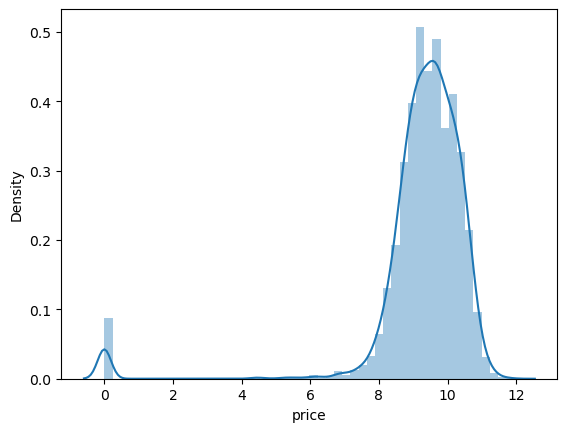

In [66]:
# Distribution plot
sns.distplot(np.log(used_cars_enc['price']))

**Observation:**
Plot shows that normal distribution towards left skewed.

In [67]:
# Skew
np.log(used_cars_enc['price']).skew()

-4.288590834768694

### 5.4) Correlation Heatmap for Clean Used Cars Dataset & Encoded Dataset

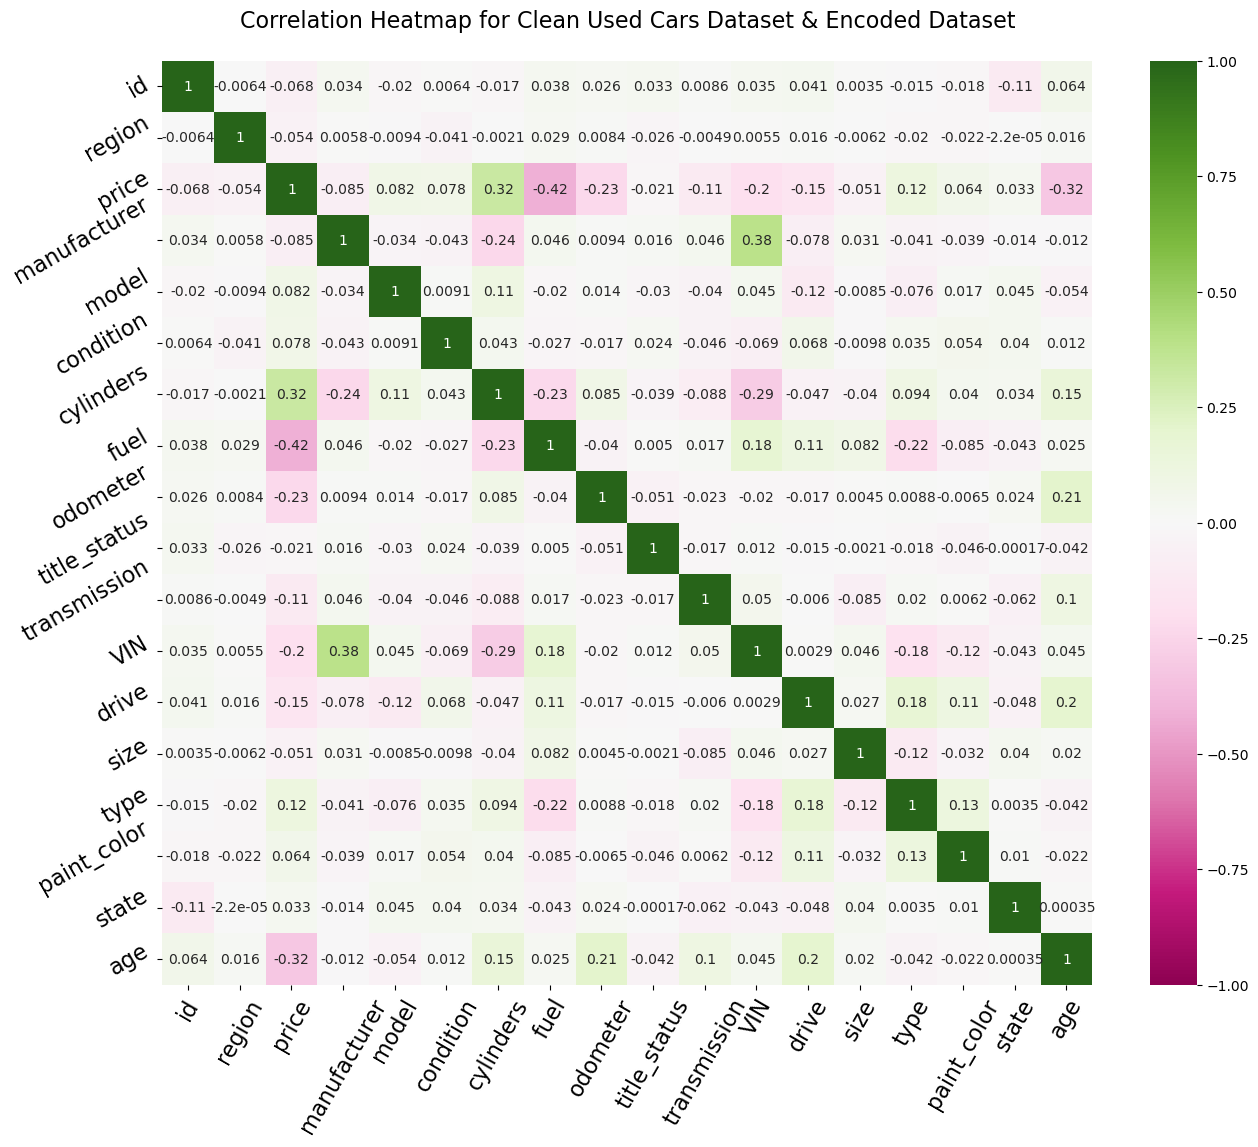

In [68]:
f, ax = plt.subplots(figsize=(15, 12))
ax.set_title('Correlation Heatmap for Clean Used Cars Dataset & Encoded Dataset', pad=24,fontsize = 16)
g = sns.heatmap(used_cars_enc.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 16)
g.set_yticklabels(g.get_yticklabels(), rotation = 30, fontsize = 16);

**Observation:**
Correlation map shows that there is a huge negative coorelation between Fuel and age have with dependent/ target column "price".

In [69]:
# Final transformation - Dropping Fuel and age coulmns based on huge negative correlation 
cols_to_drop = ['fuel','age']
used_cars_enc_features = used_cars_enc.drop(columns=cols_to_drop).dropna()

In [70]:
# used_cars final copy - info
print(used_cars_enc_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32496 entries, 0 to 32495
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32496 non-null  int64  
 1   region        32496 non-null  int64  
 2   price         32496 non-null  int64  
 3   manufacturer  32496 non-null  int64  
 4   model         32496 non-null  int64  
 5   condition     32496 non-null  int64  
 6   cylinders     32496 non-null  int64  
 7   odometer      32496 non-null  float64
 8   title_status  32496 non-null  int64  
 9   transmission  32496 non-null  int64  
 10  VIN           32496 non-null  int64  
 11  drive         32496 non-null  int64  
 12  size          32496 non-null  int64  
 13  type          32496 non-null  int64  
 14  paint_color   32496 non-null  int64  
 15  state         32496 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 4.0 MB
None


In [71]:
# used_cars final copy - describe
print(used_cars_enc_features.describe())

                 id        region          price  manufacturer         model  \
count  3.249600e+04  32496.000000   32496.000000  32496.000000  32496.000000   
mean   7.311551e+09    194.323578   16993.479013     18.596166   2569.708364   
std    4.294195e+06    115.114872   13219.394890     11.111711   1416.974778   
min    7.301592e+09      0.000000       1.000000      0.000000      0.000000   
25%    7.308238e+09     92.000000    7500.000000     10.000000   1387.750000   
50%    7.312411e+09    196.000000   13125.500000     14.000000   2542.000000   
75%    7.315154e+09    288.000000   23395.000000     30.000000   3950.000000   
max    7.317099e+09    389.000000  155000.000000     40.000000   4946.000000   

          condition     cylinders      odometer  title_status  transmission  \
count  32496.000000  32496.000000  3.249600e+04  32496.000000  32496.000000   
mean       0.991014      4.558776  1.089832e+05      0.138694      0.093365   
std        1.179574      1.375491  1.02271

In [72]:
# used_cars final copy - head
print(used_cars_enc_features.head())

           id  region  price  manufacturer  model  condition  cylinders  \
0  7316482063      28   4000            38   1591          0          3   
1  7316429417      28   2500             4    382          1          5   
2  7315946365      28   9000            25   3094          0          3   
3  7315354216      28   8950            13   1926          0          5   
4  7315349921      28   4000            26    751          1          5   

   odometer  title_status  transmission    VIN  drive  size  type  \
0  155000.0             0             0  17047      1     0     9   
1  110661.0             0             0  19375      2     2     9   
2   56700.0             0             0  16472      2     0     2   
3  164000.0             0             0   3770      1     1    10   
4   88100.0             0             0      8      2     1     3   

   paint_color  state  
0            1      1  
1           10      1  
2           10      1  
3           10      1  
4            9

In [73]:
# used_cars final copy - tail
print(used_cars_enc_features.tail())

               id  region  price  manufacturer  model  condition  cylinders  \
32491  7303314912     383  23495            13   2129          3          6   
32492  7303227528     383  12995             7   1346          3          3   
32493  7303114896     383  32999            13   2223          0          6   
32494  7303112347     383  15999             7   1356          0          3   
32495  7302338378     383   6800            19   4861          2          6   

       odometer  title_status  transmission    VIN  drive  size  type  \
32491  146795.0             0             0   3672      0     1    10   
32492   61127.0             0             0   4495      1     0     9   
32493  154642.0             0             0   3020      0     1     8   
32494   36465.0             0             0   4512      1     2     9   
32495   69550.0             0             0  18701      2     0     2   

       paint_color  state  
32491            0     50  
32492            9     50  
32

### 6) Modeling

With your final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### 6.1) Data Preparation for Modeling
Use 70% training set & 30% test set
Scaled data using Sandard Scaler

In [74]:
# Create X & target y sets
feature_cols = used_cars_enc_features.columns.values.tolist()
feature_cols.remove('price')

X = used_cars_enc_features[feature_cols]
y = used_cars_enc_features['price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


# print(X_train.shape)
# print(y_test.shape)

### 6.2) Regression Models 
**Picked below 3 models:**

LinearRegression

Lasso

RandomForestRegressor


In [75]:
# Ensamble method to select best fit model
def reg_model_metrics(reg_models, X_train, X_test, y_train, y_test):
    """ Function for different models and training and testing sets, and ouputs the below metrics in a dataframe:
    1. R² or Coefficient of Determination.
    2. Adjusted R²
    3. Mean Squared Error(MSE)
    4. Root-Mean-Squared-Error(RMSE).
    5. Mean-Absolute-Error(MAE).
    6. Model training and test scores or accuracies
    7. Plots graph between actual vs predicted datasets
    """
    
    R2_result         = []
    adj_R2_result     = []
    MSE_result        = []
    RMSE_result       = []
    MAE_result        = []
    str_models        = []
    training_score    = []
    testing_score     = []
    
    for model_name, model in reg_models.items():
        
        # Get predicted values on x_test
        pred_model = model.fit(X_train,y_train)
        y_pred = pred_model.predict(X_test)
        str_models.append(str(model_name))
        
        #1 & 2 Coefficient of Determination (R² & Adjusted R²)
        r2 = r2_score(y_test,y_pred)
        adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        R2_result.append(round(r2, 2))
        adj_R2_result.append(round(adj_r2, 2))

        #3 & 4. MSE and RMSE
        mse = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=True)
        rmse = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False)
        MSE_result.append(round(mse, 2))
        RMSE_result.append(round(rmse, 2))

        #5. MAE
        mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
        MAE_result.append(round(mae, 2))
    
        #6. Model training and test scores or accuracies
        train_score = round(pred_model.score(X_train, y_train)*100, 2)
        test_score = round(pred_model.score(X_test, y_test)*100, 2)
       
        training_score.append(train_score)
        testing_score.append(test_score)

        number_of_observations=50
        x_ax = range(len(y_test[:number_of_observations]))

        plt.figure(figsize=(16,8))
        plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
        plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
        plt.title("Prices of Used Car: Predicted - Actual using "+ str(model))
        plt.xlabel('Observation #')
        plt.ylabel('Price')
        plt.xticks(np.arange(number_of_observations))
        plt.legend()
        plt.grid()
        plt.show();


    return pd.DataFrame({'models':str_models, 'R2':R2_result,'Adj_R2':adj_R2_result,'MSE':MSE_result,
                         'RMSE':RMSE_result,'MAE': MAE_result,
                         'Training_Score':training_score,
                         'Test_Score':testing_score
                        }) 


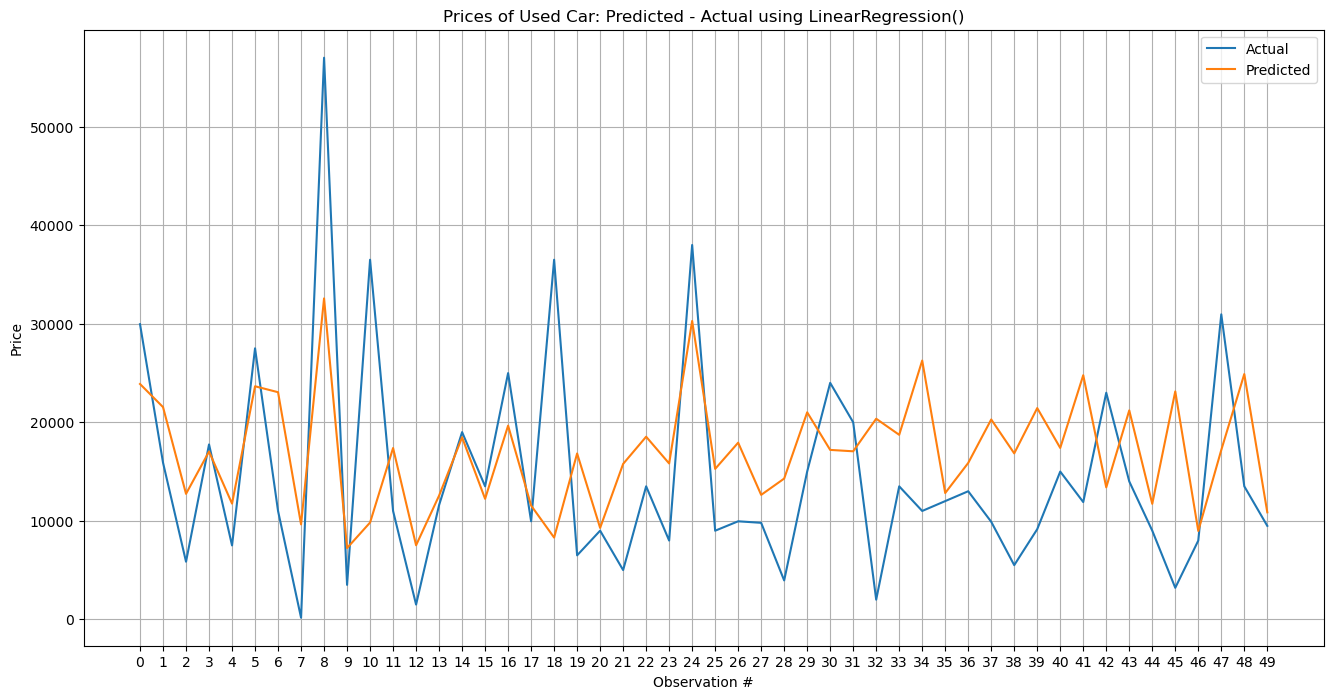

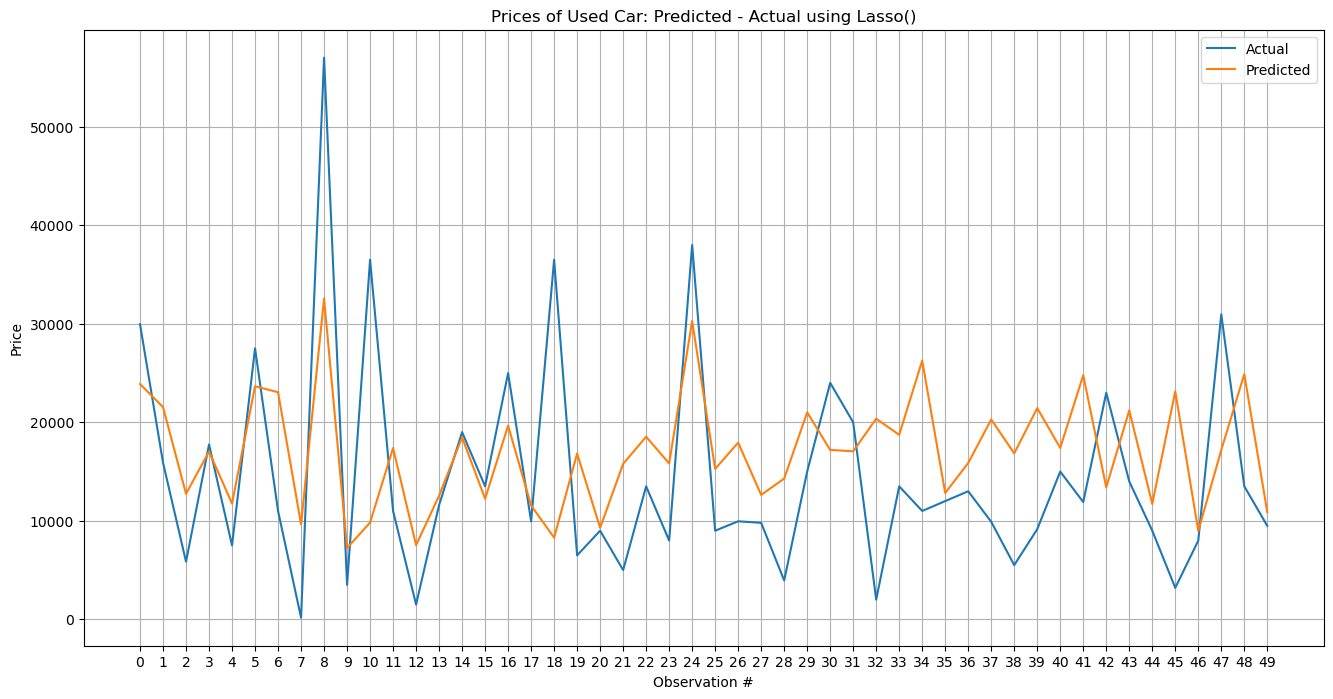

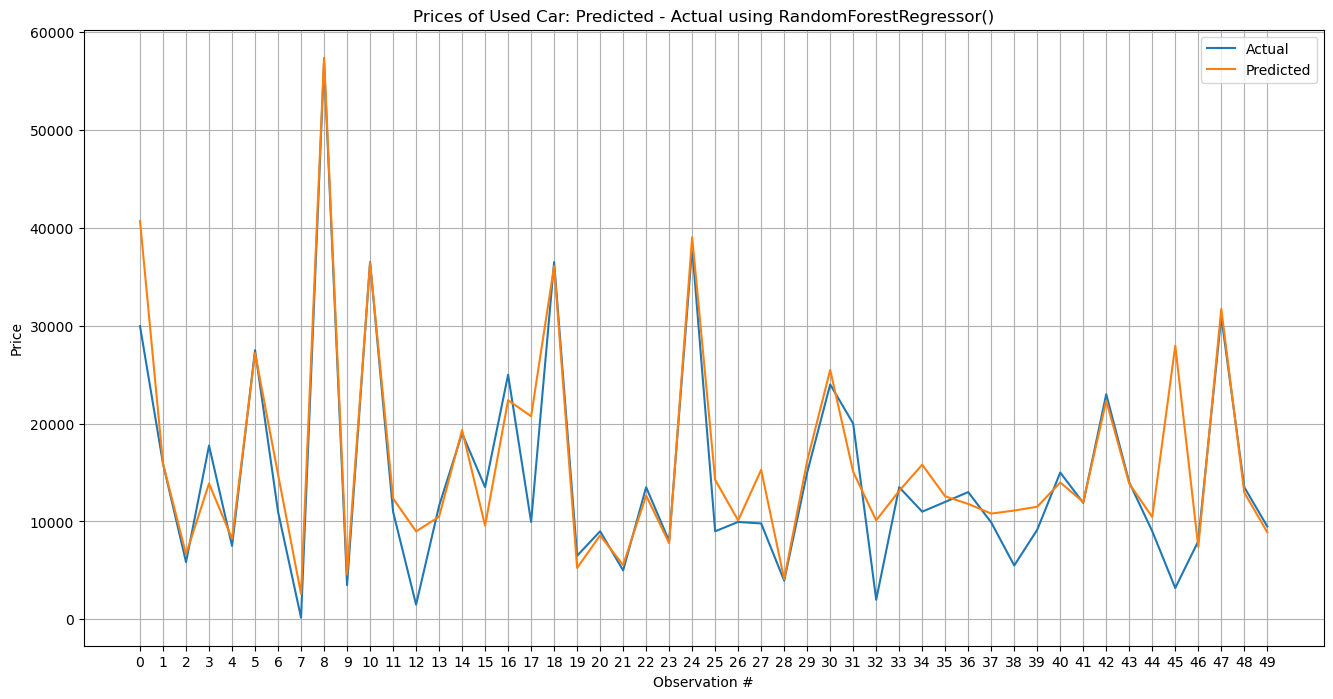

,models,R2,Adj_R2,MSE,RMSE,MAE,Training_Score,Test_Score
0,Linear Regression,0.19,0.19,1.402280e+08,11841.79,8167.48,25.06,19.43
1,Lasso,0.19,0.19,1.402225e+08,11841.56,8167.66,25.06,19.43
2,RandomForestRegressor,0.82,0.82,3.047244e+07,5520.19,2983.91,97.51,82.49


In [76]:
# Regression Plots
regression_models={'Linear Regression':LinearRegression(), 
                   'Lasso' : Lasso(),
                   'RandomForestRegressor': RandomForestRegressor()
                  }
reg_model_metrics(regression_models,X_train, X_test, y_train, y_test)


**Observation:**
RandomForestRegressor models seems to be the best model as per the above scores both in Training set and Test set, highest among the 3 models.

Hence, RandomForestRegressor will be used for predictin.


In [77]:
# Tuning function

def tuning_param(model, X_train, y_train, parameters):
        
    scores = []
   
    for parameter in parameters:
        
        gcv = GridSearchCV(estimator = model, param_grid = parameter, cv=5, scoring='r2')
        gcv.fit(X_train, y_train)

        for name_param, val_param in parameter.items():
            
            grid_mean_scores = gcv.cv_results_['mean_test_score']
            
            
        scores.append({'parameter':name_param,
                       'best_R2':gcv.best_score_,
                       'best_value':gcv.best_params_})
            

    return pd.DataFrame(scores, columns=['parameter', 'best_R2', 'best_value'])


### 7) Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### 7.1) Prediction vs Actual Comparasion

In [78]:
def predict_price(used_cars_sample_df):
    """ Function for sample dataframe from the clean dataset, and ouputs for predicted price array:"""
#     'region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
#     'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state'
    x     = np.zeros(15)
    x[0]  = used_cars_sample_df['id'].values[0]
    x[1]  = encoders[cat_columns.index('region')].transform([used_cars_sample_df['region'].values[0]])
    x[2]  = encoders[cat_columns.index('manufacturer')].transform([used_cars_sample_df['manufacturer'].values[0]])
    x[3]  = encoders[cat_columns.index('model')].transform([used_cars_sample_df['model'].values[0]])
    x[4]  = encoders[cat_columns.index('condition')].transform([used_cars_sample_df['condition'].values[0]])
    x[5]  = encoders[cat_columns.index('cylinders')].transform([used_cars_sample_df['cylinders'].values[0]])
#     x[6]  = encoders[cat_columns.index('fuel')].transform([used_cars_sample_df['fuel'].values[0]])
    x[6]  = used_cars_sample_df['odometer'].values[0]
    x[7]  = encoders[cat_columns.index('title_status')].transform([used_cars_sample_df['title_status'].values[0]])
    x[8]  = encoders[cat_columns.index('transmission')].transform([used_cars_sample_df['transmission'].values[0]])
    x[9]  = encoders[cat_columns.index('VIN')].transform([used_cars_sample_df['VIN'].values[0]])
    x[10]  = encoders[cat_columns.index('drive')].transform([used_cars_sample_df['drive'].values[0]])
    x[11]  = encoders[cat_columns.index('size')].transform([used_cars_sample_df['size'].values[0]])
    x[12] = encoders[cat_columns.index('type')].transform([used_cars_sample_df['type'].values[0]])
    x[13] = encoders[cat_columns.index('paint_color')].transform([used_cars_sample_df['paint_color'].values[0]])
    x[14] = encoders[cat_columns.index('state')].transform([used_cars_sample_df['state'].values[0]])
#     x[16] = used_cars_sample_df['age'].values[0]
    
    x = scaler.transform([x])
    
    return regression_models['RandomForestRegressor'].predict(x)

### 7.2) Prediction and Comparasion with Actuals: 5 random samples

In [79]:
sample_df = used_cars_clean.sample(1)
predicted_price = predict_price(sample_df)

for i in range(1,6):
    sample_df = used_cars_clean.sample(1)
    predicted_price = predict_price(sample_df)    
    print('******************************************************')
    print('Actual Price: ', sample_df['price'].values[0], '  ->  Predicted Price: ',predicted_price[0])

******************************************************
Actual Price:  5800   ->  Predicted Price:  5901.09
******************************************************
Actual Price:  19995   ->  Predicted Price:  22182.82
******************************************************
Actual Price:  17000   ->  Predicted Price:  15789.4
******************************************************
Actual Price:  17995   ->  Predicted Price:  17798.59
******************************************************
Actual Price:  12991   ->  Predicted Price:  10402.15


### 7.3) Prediction and Comparasion with Actuals: 10 random samples

In [80]:
sample_df = used_cars_clean.sample(1)
predicted_price = predict_price(sample_df)

for i in range(1,11):
    sample_df = used_cars_clean.sample(1)
    predicted_price = predict_price(sample_df)    
    print('******************************************************')
    print('Actual Price: ', sample_df['price'].values[0], '  ->  Predicted Price: ',predicted_price[0])

******************************************************
Actual Price:  1   ->  Predicted Price:  1.0
******************************************************
Actual Price:  41500   ->  Predicted Price:  40515.95
******************************************************
Actual Price:  3250   ->  Predicted Price:  5695.46
******************************************************
Actual Price:  25000   ->  Predicted Price:  24228.02
******************************************************
Actual Price:  44990   ->  Predicted Price:  44990.0
******************************************************
Actual Price:  14995   ->  Predicted Price:  14387.95
******************************************************
Actual Price:  13200   ->  Predicted Price:  13387.49
******************************************************
Actual Price:  56900   ->  Predicted Price:  56623.06
******************************************************
Actual Price:  16995   ->  Predicted Price:  17871.38
*******************************

### 7.4) Prediction and Comparasion with Actuals: 20 random samples

In [81]:
sample_df = used_cars_clean.sample(1)
predicted_price = predict_price(sample_df)

for i in range(1,21):
    sample_df = used_cars_clean.sample(1)
    predicted_price = predict_price(sample_df)    
    print('******************************************************')
    print('Actual Price: ', sample_df['price'].values[0], '  ->  Predicted Price: ',predicted_price[0])

******************************************************
Actual Price:  49995   ->  Predicted Price:  50577.85
******************************************************
Actual Price:  4888   ->  Predicted Price:  4862.36
******************************************************
Actual Price:  6500   ->  Predicted Price:  6762.38
******************************************************
Actual Price:  12999   ->  Predicted Price:  12376.8
******************************************************
Actual Price:  18499   ->  Predicted Price:  15584.35
******************************************************
Actual Price:  2000   ->  Predicted Price:  3085.64
******************************************************
Actual Price:  2400   ->  Predicted Price:  3063.01
******************************************************
Actual Price:  16988   ->  Predicted Price:  21000.84
******************************************************
Actual Price:  46800   ->  Predicted Price:  46353.9
*****************************

### 7.5) Prediction and Comparasion with Actuals: 50 random samples

In [82]:
sample_df = used_cars_clean.sample(1)
predicted_price = predict_price(sample_df)

for i in range(1,51):
    sample_df = used_cars_clean.sample(1)
    predicted_price = predict_price(sample_df)    
    print('******************************************************')
    print('Actual Price: ', sample_df['price'].values[0], '  ->  Predicted Price: ',predicted_price[0])

******************************************************
Actual Price:  7995   ->  Predicted Price:  8417.5
******************************************************
Actual Price:  5995   ->  Predicted Price:  7346.04
******************************************************
Actual Price:  1   ->  Predicted Price:  279.98
******************************************************
Actual Price:  17995   ->  Predicted Price:  17883.23
******************************************************
Actual Price:  15950   ->  Predicted Price:  15683.63
******************************************************
Actual Price:  26250   ->  Predicted Price:  16337.48
******************************************************
Actual Price:  25000   ->  Predicted Price:  27048.67
******************************************************
Actual Price:  700   ->  Predicted Price:  2738.57
******************************************************
Actual Price:  30988   ->  Predicted Price:  32615.73
*********************************

**Observations:**
Model predictions are not very accuarate, may needs more tuning.



### 8) Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### 9) Findings

Now that we've solution deployed, we are highlighting our findings based on regeression model selected. Together with I am outlining the challenges we faced throught from data import to cleansing to modeling and evaluation and deployment.

Finally, putting recommendation and further improvement in form of conclusion drwan from data analysis to modeling and evaluation.


### 9.1) Key Observations

**1) Top 5 manufacturer's cars in the used cars inventory are:**

a) Chevrolet

b) Ford

c) Honda

d) Jeep

e) Toyota

**2) Top priced used cars on an average are from these manufacturers:**
    
a) Ferrari

b) Jeep

c) Mercedes-benz

d) Toyota

e) Volvo

**3) Top 5 states that have maximum number of used car inventory are:**

a) California

b) Florida

c) Ohio

d) New York

e) Texas

**4) Impact of cars's age on used cars price**

a) Less old cars are more expensive in regular car segment.

b) In vintagee cars segment, old cars are more expensive.

**5) Impact of number of cylinders in cars on used cars price**

Cars having 8 cylinders or 6 cylinders are more expensive.


**6) Impact of cars's Title classificstion on used cars price**

Clean status are sold high in number than rebuild,salvage,Lien & missing

### 9.2) Data Complexities & Challenges:

a) There were lots of null, missing or zero vaues. 
b) There were cars data in the dataset but could be related to abandoned cars, as haveee zero price.
c) Price distribution was skewed towards left.
d) Data cleansing is an important aspect to avoid rerelevant data in the analysis, for example cars those were abonded and marked as zero price.


### 9.3) Conclusion & Recommendations for further improvement

a) The selected model is approx 90% accurate, so shlould be train on more ensable regression models

b) This model is analysis was done in raw manner, it would be helpful if can be integrated as part of APP or GUI, so even non technical salesperson can input data and get projected price from model in user friendly manner wihtout too much technical details.

c) There should be continous learning / update process based on further business models to keep updating models to adopt real world challenges, negotiations, sessional discounts, inventory clearness etc, to make the prediction more robust based on other external factors.

Thank You!